# Department of Defense 1033 Transfers Post Ferguson

This notebook analyzes tranfers from the Defense Logistics Agency through the "1033" program after the protests in Ferguson, MO after the killing of Michael Brown in August 2014. The DLA provides [quarterly data](https://www.dla.mil/DispositionServices/Offers/Reutilization/LawEnforcement/PublicInformation/) of "the accountable property held by participating agencies".

In [1]:
import pandas as pd
import matplotlib as mpl
%matplotlib inline

## Load Data

*Note:* BuzzFeed News transformed the data, which comes in an multi-tabbed Excel file, into a CSV for easier analysis. That CSV file is what is loaded below.

In [2]:
data = (
    pd
    .read_csv(
        "../outputs/dla-1033-transfers.csv", 
        parse_dates = ["Ship Date"]
    )
    .assign(
        federal_supply_class = lambda x: x["NSN"].apply(lambda y: y[:4]),
        year = lambda x: x["Ship Date"].apply(lambda y: y.year)
    )
)

In [3]:
data.sample(5)

,State,Station Name (LEA),NSN,Item Name,Quantity,UI,Acquisition Value,DEMIL Code,DEMIL IC,Ship Date,Station Type,federal_supply_class,year
52753,KS,COFFEYVILLE POLICE DEPT,1385-DS-ROB-TEOD,EOD ROBOT,1,Each,2000.0,D,NaN,2015-07-14,State,1385,2015
34357,GA,COLUMBUS POLICE DEPARTMENT,2355-01-553-4634,MINE RESISTANT VEHICLE,1,Each,658000.0,C,1.0,2013-10-24,State,2355,2013
56865,KY,STATE POLICE,1005-00-856-6885,"RIFLE,5.56 MILLIMETER",1,Each,120.0,D,1.0,2011-04-12,State,1005,2011
7347,AR,JEFFERSON COUNTY SHERIFF DEPT,2330-00-838-2320,MOTOR VEH/TRLR/CYCL,1,Each,4744.0,A,1.0,2019-12-04,State,2330,2019
77890,MO,LINN CREEK POLICE DEPT,1005-00-073-9421,"RIFLE,5.56 MILLIMETER",1,Each,499.0,D,1.0,2013-05-24,State,1005,2013


The Ferguson, MO protests ended on August 25, 2014, so this analysis looks at all transfers after that date.

In [4]:
post_ferguson = data[
    lambda x: x["Ship Date"] > "2014-08-25"
].copy()

In [5]:
'''Since Ferguson there have been {:,} total transfers of equipment that are still held by the police agency. They total ${:,}.'''.format(
    len(post_ferguson),
    post_ferguson["Acquisition Value"].sum()
)

'Since Ferguson there have been 47,429 total transfers of equipment that are still held by the police agency. They total $854,104,343.93.'

## Analyze item transfers

### MRAPs

In [6]:
mraps = post_ferguson[
    lambda x: x["Item Name"] == "MINE RESISTANT VEHICLE"
]

In [7]:
mraps["Quantity"].sum()

494

In [8]:
mraps.groupby("year")["Quantity"].sum()

year
2014      6
2016    204
2017     56
2018     36
2019    153
2020     39
Name: Quantity, dtype: int64

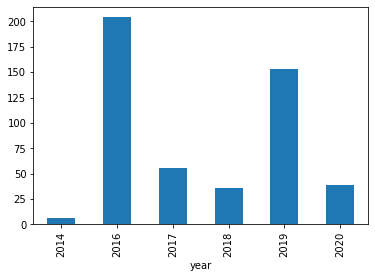

In [9]:
mraps.groupby("year")["Quantity"].sum().plot(kind="bar")
pass

In [10]:
mraps.groupby("State")["Quantity"].sum().sort_values(ascending=False).head(10)

State
TN    55
TX    42
NC    30
FL    29
AL    26
MN    21
MI    18
WI    18
MS    16
GA    16
Name: Quantity, dtype: int64

In [11]:
mraps.to_csv("../outputs/mraps.csv", index=None)

In [12]:
police_depts = [
    "JEFFERSON COUNTY SHERIFF'S OFFICE", # Birmingham county
    "NEW YORK CITY POLICE DEPARTMENT",
    "FULTON COUNTY SHERIFF DEPT", # Atlanta county
    "RAMSEY COUNTY SHERIFF DEPT", # St. Paul county
    "MEMPHIS POLICE DEPT",
    "TRAVIS COUNTY SHERIFFS OFFICE", # Austin county
    "SALT LAKE CITY POLICE DEPT"
]

In [13]:
mraps.loc[
    lambda x: x["Station Name (LEA)"].isin(police_depts) & 
    (x["State"] != "FL") # two different Jefferson County received MRAPs, this gets rid of the erroneous one
]

,State,Station Name (LEA),NSN,Item Name,Quantity,UI,Acquisition Value,DEMIL Code,DEMIL IC,Ship Date,Station Type,federal_supply_class,year
3671,AL,JEFFERSON COUNTY SHERIFF'S OFFICE,2355-01-582-6466,MINE RESISTANT VEHICLE,1,Each,689000.0,C,1.0,2020-02-12,State,2355,2020
35371,GA,FULTON COUNTY SHERIFF DEPT,2355-01-553-4634,MINE RESISTANT VEHICLE,1,Each,658000.0,C,1.0,2016-03-31,State,2355,2016
73804,MN,RAMSEY COUNTY SHERIFF DEPT,2355-01-561-0281,MINE RESISTANT VEHICLE,1,Each,689000.0,C,1.0,2016-06-07,State,2355,2016
85726,NY,NEW YORK CITY POLICE DEPARTMENT,2355-01-602-3357,MINE RESISTANT VEHICLE,1,Each,865000.0,C,1.0,2016-03-09,State,2355,2016
85727,NY,NEW YORK CITY POLICE DEPARTMENT,2355-01-553-4634,MINE RESISTANT VEHICLE,1,Each,658000.0,C,1.0,2017-01-18,State,2355,2017
117567,TN,MEMPHIS POLICE DEPT,2355-01-596-1330,MINE RESISTANT VEHICLE,1,Each,575000.0,C,1.0,2019-08-01,State,2355,2019
117571,TN,MEMPHIS POLICE DEPT,2355-01-553-4634,MINE RESISTANT VEHICLE,1,Each,658000.0,C,1.0,2016-03-17,State,2355,2016
128833,TX,TRAVIS COUNTY SHERIFFS OFFICE,2355-01-623-0967,MINE RESISTANT VEHICLE,1,Each,767360.0,C,1.0,2019-08-27,State,2355,2019
129999,UT,SALT LAKE CITY POLICE DEPT,2355-01-553-4634,MINE RESISTANT VEHICLE,1,Each,658000.0,C,1.0,2017-01-24,State,2355,2017


### Body Armor

In [14]:
body_armor = post_ferguson.loc[
    lambda x: x["federal_supply_class"].isin(["8470"]) # the federal supply class for Armor, Personal
]

In [15]:
body_armor["Quantity"].sum()

886

In [16]:
body_armor.groupby("year")["Quantity"].sum()

year
2014     26
2015     36
2016     33
2017     13
2018     85
2019    393
2020    300
Name: Quantity, dtype: int64

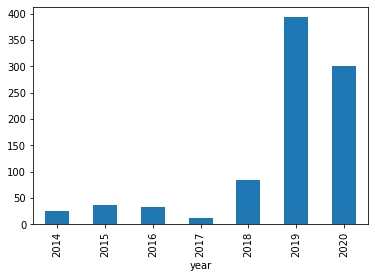

In [17]:
body_armor.groupby("year")["Quantity"].sum().plot(kind="bar")
pass

In [18]:
body_armor.groupby(["Item Name"])["Quantity"].sum().sort_values(ascending=False)

Item Name
SHIELD,PERSONAL PROTECTIVE                         303
BAG,BODY ARMOR HELMET                              201
CARRIER,SMALL ARMS PROTECTIVE BODY ARMOR            92
VEST,REL,BA,S,GREEN                                 40
BODY ARMOR,FRAGMENTATION PROTECTIVE                 38
HELMET COVER,BALLIS                                 33
HELMET,GROUND TROOPS'                               29
VEST,SMALL ARMS PROTECTIVE BODY ARMOR               29
VEST,REL,BA,XL,WDL                                  27
HELMET,GROUND TROOPS-PARACHUTISTS                   14
PAD,ADVANCED COMBAT HELMET NAPE,BALLASTIC           12
PLATE CARRIER,REAR                                  12
PLATE CARRIER,FRONT                                 10
SUIT,EXPLOSIVE ORDNANCE DISPOSAL                    10
VEST,REL,BA,L,GREEN                                 10
POWER SUPPLY,EXPLOSIVE ORDNANCE DISPOSAL HELMET      6
REPAIR KIT,HELMET                                    6
HELMET,GROUND TROOPS                                 4


In [19]:
body_armor.loc[
    lambda x: x["Item Name"] == "BALLISTIC SHIELDS"
]

,State,Station Name (LEA),NSN,Item Name,Quantity,UI,Acquisition Value,DEMIL Code,DEMIL IC,Ship Date,Station Type,federal_supply_class,year
131787,VA,LURAY POLICE DEPT,8470-01-386-2970,BALLISTIC SHIELDS,1,Each,1116.59,D,1.0,2016-11-16,State,8470,2016


In [20]:
body_armor.groupby(["Station Name (LEA)", "State"])["Quantity"].sum().sort_values(ascending=False).head(10)

Station Name (LEA)                 State
MILWAUKEE POLICE DEPT              WI       254
BLOUNT COUNTY SHERIFFS OFFICE      TN        94
LAFAYETTE POLICE DEPARTMENT        IN        92
HOLMDEL TWP POLICE DEPT            NJ        46
WEATHERLY POLICE DEPT              PA        45
HOPE MILLS POLICE DEPT             NC        44
GREEN BAY POLICE DEPT              WI        27
BUENA VISTA COUNTY SHERIFF OFFICE  IA        22
SHERBURNE COUNTY SHERIFF'S OFFICE  MN        22
CHESTER POLICE DEPT                PA        20
Name: Quantity, dtype: int64

In [21]:
post_ferguson[
    lambda x: x["Item Name"].str.contains("RIOT")
].groupby("Item Name")["Quantity"].sum()

Item Name
FACESHIELD,MILITARY,RIOT CONTROL    85
FACESHIELD,RIOT CONTROL             59
RIOT CONTROL SHIELD                 63
SUIT,RIOT TRAINING                   1
SUIT,RIOT TRAINING                   4
Name: Quantity, dtype: int64

In [22]:
post_ferguson[
    # riot gear can also be classified as Clothing, Special Purpose
    # or Safety and Rescue Equipment this captures those additional pieces
    lambda x: x["Item Name"].str.contains("RIOT")
].groupby("Item Name")["Quantity"].sum()

Item Name
FACESHIELD,MILITARY,RIOT CONTROL    85
FACESHIELD,RIOT CONTROL             59
RIOT CONTROL SHIELD                 63
SUIT,RIOT TRAINING                   1
SUIT,RIOT TRAINING                   4
Name: Quantity, dtype: int64

### Rifles

In [23]:
rifles = post_ferguson[
    lambda x: x["Item Name"].isin(["RIFLE,5.56 MILLIMETER", "RIFLE,7.62 MILLIMETER"])
]

In [24]:
rifles["Quantity"].sum()

6508

In [25]:
rifles.groupby("year")["Quantity"].sum()

year
2014    4534
2015     786
2017    1187
2018       1
Name: Quantity, dtype: int64

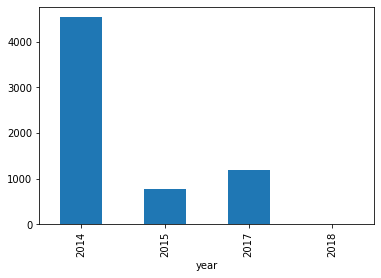

In [26]:
rifles.groupby("year")["Quantity"].sum().plot(kind="bar")
pass

### Aircraft

In [27]:
aircraft = post_ferguson.loc[
    lambda x: x["Item Name"].isin([
        "HELICOPTER,OBSERVATION",
        "HELICOPTER,UTILITY",
        "AIRCRAFT, FIXED WING",
        "AIRPLANE,CARGO-TRANSPORT",
        "HELICOPTER,MEDEVAC"
    ])
]

In [28]:
aircraft["Quantity"].sum()

76

In [29]:
aircraft.groupby("year")["Quantity"].sum()

year
2014    18
2015     5
2016    10
2017    18
2018    25
Name: Quantity, dtype: int64

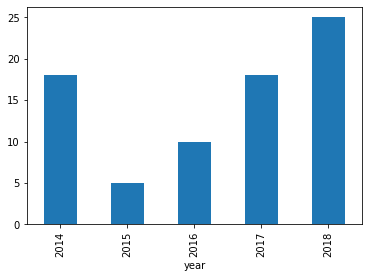

In [30]:
aircraft.groupby("year")["Quantity"].sum().plot(kind="bar")
pass

In [31]:
aircraft[
    lambda x: x["Station Name (LEA)"] == "ARIZONA DEPT OF PUBLIC SAFETY"
]

,State,Station Name (LEA),NSN,Item Name,Quantity,UI,Acquisition Value,DEMIL Code,DEMIL IC,Ship Date,Station Type,federal_supply_class,year
8873,AZ,ARIZONA DEPT OF PUBLIC SAFETY,1510-DS-FIX-WNGA,"AIRCRAFT, FIXED WING",1,Each,17000000.0,C,NaN,2015-12-03 11:37:01.999,State,1510,2015
8894,AZ,ARIZONA DEPT OF PUBLIC SAFETY,1510-DS-FIX-WNGA,"AIRCRAFT, FIXED WING",1,Each,17000000.0,C,NaN,2015-12-03 11:37:01.999,State,1510,2015
8895,AZ,ARIZONA DEPT OF PUBLIC SAFETY,1510-DS-FIX-WNGA,"AIRCRAFT, FIXED WING",1,Each,17000000.0,C,NaN,2015-12-03 11:37:01.999,State,1510,2015


### Bayonets

In [32]:
post_ferguson.loc[
    lambda x: x["Item Name"].str.contains("BAYONET")
]["Quantity"].sum()

167

---

---

---